# TP1 - Computational statistics

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.decomposition import PCA

## Exercise 3

### 1.

When minimizing a convex function, one can use the stochastic gradient descent algorithm to iteratively obtain the or a minimum of the function over its domain. There exists multiple variants of the stochastic gradient algorithm. The basic algorithm is the following, where the time step is choosen as constant, and we do not use any criterion to stop the algorithm during the training:

$
\textbf{chose} \ \text{a starting point} \ w = w_0 \\
\text{for ep in range(epochs)} \\
\ \text{for i in shuffle(len(X))} \\
\ \ x, y = X[i], Y[i] \\
\ \  x = x -t \nabla f(w,x,y) \\
$



In [3]:
### Implementation

def stochastic_gradient_descent(grad_f, w0, X, Z, lr, epochs):

    #We assume we can compute an explicit form of the gradient of f, which is the case in our problem 
    n_samples = Z.shape[0]
    w = w0
    for ep in range(epochs):
        for i in np.random.randint(0, n_samples, n_samples):
            x, z = X[i], Z[i]
            w = w - lr * grad_f(w, x, z)
    return w

### 2.

In [25]:
n = 500 #number of points 
X = 2 * np.random.rand(n, 2) - 1#xi, sampled in [-1,1]*[-1,1]
w = 2 * np.random.rand(1,2) - 1 #hyperplane

lr, epochs = 1e-3, 10 #learning rate
Z = np.array([int(np.dot(w,x)[0] >= 0) for x in X]) #labels
Z[Z == 0] = -1

In [26]:
print("Number of labeled 1:", np.sum(Z > 0)) 
print("Number of labeled -1:", np.sum(Z < 0)) 

Number of labeled 1: 244
Number of labeled -1: 256


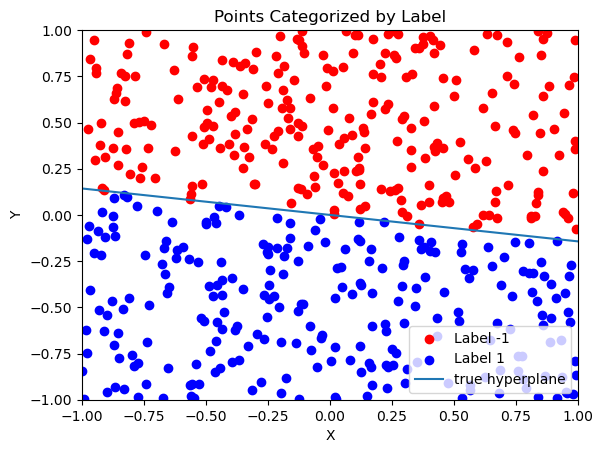

In [27]:
# Generate x and y data points for the line
d = np.linspace(-1, 1, 100)  
y = (-w[0,0] / w[0,1]) * d

plt.scatter(X[Z == -1][:, 0], X[Z == -1][:, 1], color='red', label='Label -1')
plt.scatter(X[Z == 1][:, 0], X[Z == 1][:, 1], color='blue', label='Label 1')
plt.plot(d, y, label = 'true hyperplane')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points Categorized by Label')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

### 3.

In [28]:
def f(w, x, z):
    return (z - np.dot(x,w))**2

def grad_f(w, x, z):
    return -2*(z - np.dot(x,w[0]))*x

In [29]:
w0 =  2 * np.random.rand(1,2) - 1
w_pred = stochastic_gradient_descent(grad_f, w0, X, Z, lr, epochs)

In [30]:
w, w_pred #the two w

(array([[-0.10776547, -0.75284989]]), array([[-0.12519766, -1.42960641]]))

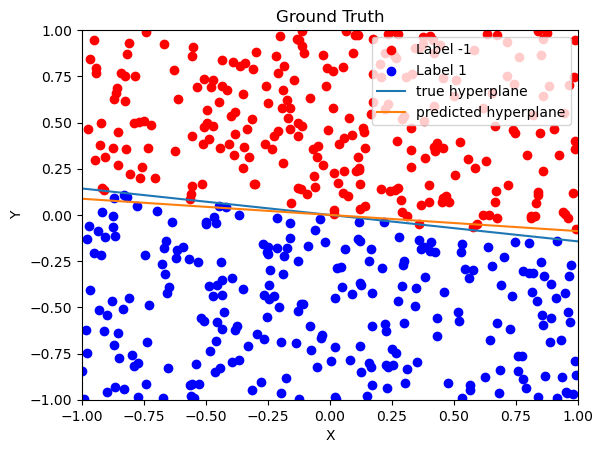

In [31]:
# Generate x and y data points for the line
d = np.linspace(-1, 1, 100)  
y, y_pred = (-w[0,0] / w[0,1]) * d, (-w_pred[0,0] / w_pred[0,1]) * d

plt.scatter(X[Z == -1][:, 0], X[Z == -1][:, 1], color='red', label='Label -1')
plt.scatter(X[Z == 1][:, 0], X[Z == 1][:, 1], color='blue', label='Label 1')
plt.plot(d, y, label = 'true hyperplane')
plt.plot(d, y_pred, label = 'predicted hyperplane')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ground Truth')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

In [32]:
Z_pred = np.array([int(np.dot(w_pred,x)[0] >= 0) for x in X]) #labels
Z_pred[Z_pred == 0] = -1 
print("Number of good match:", np.sum(Z_pred == Z))

Number of good match: 493


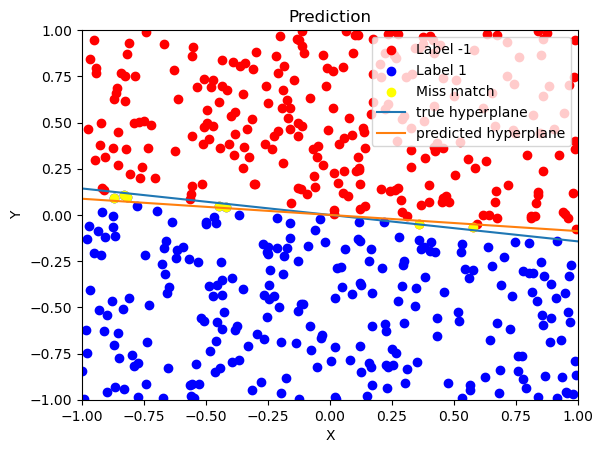

In [33]:
# Generate x and y data points for the line
d = np.linspace(-1, 1, 100)  
y, y_pred = (-w[0,0] / w[0,1]) * d, (-w_pred[0,0] / w_pred[0,1]) * d

plt.scatter(X[Z == -1][:, 0], X[Z == -1][:, 1], color='red', label='Label -1')
plt.scatter(X[Z == 1][:, 0], X[Z == 1][:, 1], color='blue', label='Label 1')
plt.scatter(X[Z_pred != Z][:, 0], X[Z_pred != Z][:, 1], color='yellow', label='Miss match')

plt.plot(d, y, label = 'true hyperplane')
plt.plot(d, y_pred, label = 'predicted hyperplane')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

In conclusion, we see that our descent algorithm can well approximate the real w parameter.

### 4. 

In [34]:
std = 0.1

In [35]:
### Adding gaussian noise 

n = 500 #number of points 
X = 2 * np.random.rand(n, 2) - 1#xi, sampled in [-1,1]*[-1,1]
w = 2 * np.random.rand(1,2) - 1 #hyperplane

lr, epochs = 1e-3, 10 #learning rate
Z = np.array([int(np.dot(w,x)[0] >= 0) for x in X]) #labels
Z[Z == 0] = -1

X += std * np.random.randn(*X.shape)

In [36]:
Z_noise = np.array([int(np.dot(w,x)[0] >= 0) for x in X]) #labels
Z_noise[Z_noise == 0] = -1 
print("Number of good match using the optimal w:", np.sum(Z_noise == Z))

Number of good match using the optimal w: 478


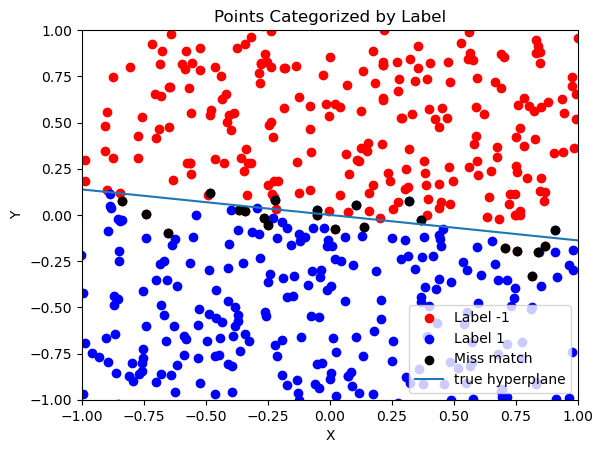

In [37]:
# Generate x and y data points for the line
d = np.linspace(-1, 1, 100)  
y = (-w[0,0] / w[0,1]) * d

plt.scatter(X[Z == -1][:, 0], X[Z == -1][:, 1], color='red', label='Label -1')
plt.scatter(X[Z == 1][:, 0], X[Z == 1][:, 1], color='blue', label='Label 1')
plt.scatter(X[Z_noise != Z][:, 0], X[Z_noise != Z][:, 1], color='black', label='Miss match')

plt.plot(d, y, label = 'true hyperplane')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Points Categorized by Label')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

In [38]:
w0 =  2 * np.random.rand(1,2) - 1
w_pred = stochastic_gradient_descent(grad_f, w0, X, Z, lr, epochs)

In [39]:
w, w_pred #the two w

(array([[-0.11416491, -0.82761653]]), array([[-0.15865827, -1.34489602]]))

In [40]:
Z_pred = np.array([int(np.dot(w_pred,x)[0] >= 0) for x in X]) #labels
Z_pred[Z_pred == 0] = -1 
print("Number of good match:", np.sum(Z_pred == Z))

Number of good match: 476


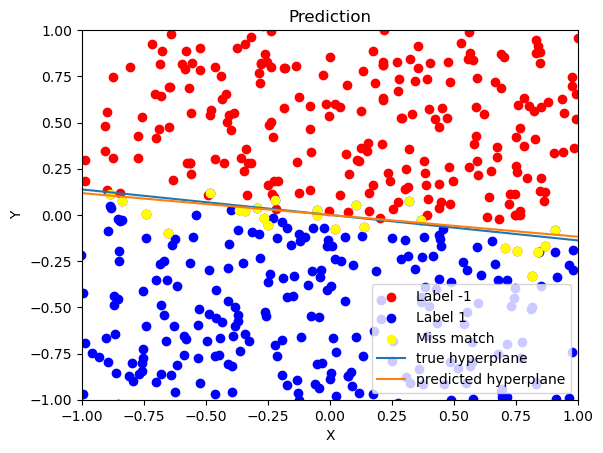

In [41]:
# Generate x and y data points for the line
d = np.linspace(-1, 1, 100)  
y, y_pred = (-w[0,0] / w[0,1]) * d, (-w_pred[0,0] / w_pred[0,1]) * d

plt.scatter(X[Z == -1][:, 0], X[Z == -1][:, 1], color='red', label='Label -1')
plt.scatter(X[Z == 1][:, 0], X[Z == 1][:, 1], color='blue', label='Label 1')
plt.scatter(X[Z_pred != Z][:, 0], X[Z_pred != Z][:, 1], color='yellow', label='Miss match')

plt.plot(d, y, label = 'true hyperplane')
plt.plot(d, y_pred, label = 'predicted hyperplane')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.show()

In conlusion, we see that in the case where the data are corrupted by some noise, which is always the case in practice, the predicted hyperplane seems to have similar performance then the real hyperplane. This further supports our strategy to use stochastic gradient descent in such problems, as our predicted solution might be better then the real one we should theoraticaly converge to. 

### 5.

In [72]:
lr, epochs = 1e-3, 10

In [73]:
path_csv = r'data\breast-cancer-wisconsin.csv'
df = pd.read_csv(path_csv, header=None)

## Clean the dataset
df.rename(columns={10: 'class'}, inplace=True)
df['class'].replace({2: -1, 4: 1}, inplace=True)
df.drop(0, axis=1, inplace=True)
df[6] = df[6].str.replace("?", "1", regex=False)

## Build the training sets
X = (df.iloc[:, 0:9].values).astype('float64')
Z =(df.iloc[:, 9].values).astype('float64')

## Standardize data to enhance the algorithm performance
X = (X-np.mean(X, axis=0))/np.std(X, axis=0)

In [74]:
print(X.shape[0], X.shape[1])
print(np.sum(Z == -1), np.sum(Z == 1))

699 9
458 241


In [75]:
w0 = np.random.randn(X.shape[1])
w_pred = stochastic_gradient_descent(grad_f, w0, X, Z, lr, epochs)

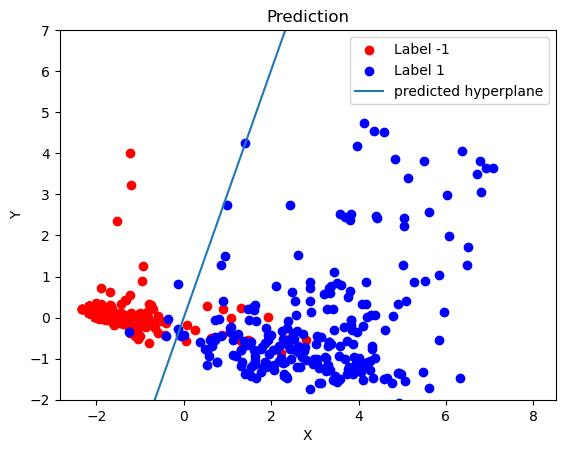

In [82]:
### TO visualize in a 2D graph, we use the PCA decomposition 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[Z == -1][:, 0], X_pca[Z == -1][:, 1], color='red', label='Label -1')
plt.scatter(X_pca[Z == 1][:, 0], X_pca[Z == 1][:, 1], color='blue', label='Label 1')

w_pred_pca = pca.transform(w_pred.reshape(1, -1))[0]
d = np.linspace(-2, 8, 100)  
y = (-w_pred_pca[0] / w_pred_pca[1]) * d
plt.plot(d, y, label = 'predicted hyperplane')

plt.ylim(-2,7)
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediction')
plt.show()

In [85]:
x = X[0]
np.dot(w_pred,x)

-13.954147088610018

In [87]:
Z_pred = np.array([int(np.dot(w_pred,x) >= 0) for x in X]) #labels
Z_pred[Z_pred == 0] = -1 
print("Number of good match:", np.sum(Z_pred == Z))
print("Number of miss match:", X.shape[0] - np.sum(Z_pred == Z))

Number of good match: 675
Number of miss match: 24


In conclusion, using this technique on this dataset, we obtain a good result. 